In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.models import Model

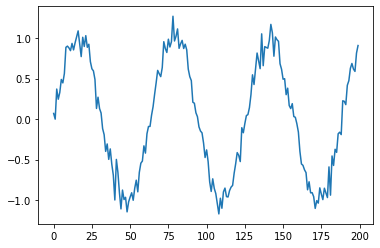

In [ ]:
series=np.sin(0.1*np.arange(0,200)) + np.random.randn(200)*0.1
plt.plot(series)

In [ ]:
T=10
X=[]
Y=[]
for t in range(len(series)-T):
  x1=series[t:t+T]
  X.append(x1)
  y1=series[t+T]
  Y.append(y1)

N=len(X)
X=np.array(X).reshape(N,T)
Y=np.array(Y)

print(X)
print(Y)
print(N)

[[ 0.0693086  -0.0009781   0.37001394 ...  0.56186306  0.88467282
   0.8993893 ]
 [-0.0009781   0.37001394  0.2445943  ...  0.88467282  0.8993893
   0.87697298]
 [ 0.37001394  0.2445943   0.32863595 ...  0.8993893   0.87697298
   0.84367991]
 ...
 [-0.16184494 -0.19133439  0.22558885 ...  0.62583517  0.68554312
   0.6175213 ]
 [-0.19133439  0.22558885  0.21903696 ...  0.68554312  0.6175213
   0.58765671]
 [ 0.22558885  0.21903696  0.17806519 ...  0.6175213   0.58765671
   0.81327526]]
[ 0.87697298  0.84367991  0.93281134  0.85296143  0.93967087  1.0110493
  1.08715285  0.93009167  0.77042596  1.00848767  0.89487612  1.02832653
  0.88485176  0.92253046  0.7083306   0.61989563  0.59349861  0.48779077
  0.1309762   0.26966151  0.1295954   0.07449619 -0.11700197 -0.19230654
 -0.39825605 -0.30690776 -0.49675606 -0.36811258 -0.55623298 -0.69188432
 -0.99757318 -0.49745523 -0.65607406 -0.9075432  -1.10763091 -0.8755853
 -0.99218028 -0.96477196 -1.14416774 -1.02169554 -0.96107259 -0.90866044
 

In [ ]:
i=Input(shape=(T,))
x=Dense(128,activation='relu')(i)
x=Dense(1)(x)
model=Model(i,x)

model.compile(optimizer=Adam(learning_rate=0.1),
              loss='mse')

#here you can give whole data for ex:
#model.fit(x1,y1,epochs=200)
r=model.fit(X[:N//2],Y[:N//2],validation_data=(X[N//2:],Y[N//2:]),epochs=200)

Epoch 1/200
3/3 [==============================] - 0s 75ms/step - loss: 23.2114 - val_loss: 23.6113
Epoch 2/200
3/3 [==============================] - 0s 19ms/step - loss: 19.2216 - val_loss: 29.0011
Epoch 3/200
3/3 [==============================] - 0s 21ms/step - loss: 17.9185 - val_loss: 2.8637
Epoch 4/200
3/3 [==============================] - 0s 20ms/step - loss: 5.0460 - val_loss: 3.6417
Epoch 5/200
3/3 [==============================] - 0s 22ms/step - loss: 1.7622 - val_loss: 4.6549
Epoch 6/200
3/3 [==============================] - 0s 20ms/step - loss: 5.6834 - val_loss: 0.5902
Epoch 7/200
3/3 [==============================] - 0s 20ms/step - loss: 0.8430 - val_loss: 2.5532
Epoch 8/200
3/3 [==============================] - 0s 21ms/step - loss: 2.5730 - val_loss: 0.1899
Epoch 9/200
3/3 [==============================] - 0s 20ms/step - loss: 0.5151 - val_loss: 1.2022
Epoch 10/200
3/3 [==============================] - 0s 18ms/step - loss: 1.4547 - val_loss: 0.1574
Epoch 11/200
3

In [ ]:
last=series[-T:]
print(last)
predicted=[]
for i in range(0,3):
  p=model.predict(last.reshape(1,-1))[0,0]
  print('p',i,'=',p)
  predicted.append(p)
  last=np.roll(last,-1)
  last[-1]=p

print(predicted)


[0.21903696 0.17806519 0.41640405 0.4732081  0.62583517 0.68554312
 0.6175213  0.58765671 0.81327526 0.90647591]
p 0 = 0.89035225
p 1 = 0.90866303
p 2 = 0.9212183
[0.89035225, 0.90866303, 0.9212183]


In [ ]:
#for cross checking
last=X[N//2]
print(last)
target=Y[N//2:]
predicted=[]
while len(predicted)<len(target):
  p=model.predict(last.reshape(1,-1))[0,0]
  print('p=',p)
  predicted.append(p)
  last=np.roll(last,-1)
  last[-1]=p

print(predicted)


[-0.09644897 -0.14728193 -0.17046679 -0.29567507 -0.47379204 -0.38014574
 -0.52588902 -0.77402352 -0.89220527 -0.73673349]
p= -0.867074
p= -1.0084064
p= -1.127397
p= -1.074395
p= -1.1047076
p= -1.1370997
p= -1.1890298
p= -1.1129011
p= -1.1201171
p= -1.0907383
p= -1.0452917
p= -0.9321271
p= -0.8820493
p= -0.8023864
p= -0.7195083
p= -0.57711554
p= -0.47787783
p= -0.36591634
p= -0.25690696
p= -0.11617403
p= -0.0050362945
p= 0.121717185
p= 0.24194708
p= 0.37975666
p= 0.49773493
p= 0.61860013
p= 0.720248
p= 0.82052886
p= 0.9071511
p= 0.9968655
p= 1.0755755
p= 1.1486659
p= 1.2065125
p= 1.2574701
p= 1.2959946
p= 1.3265073
p= 1.3449116
p= 1.3534081
p= 1.3476081
p= 1.3298262
p= 1.2991767
p= 1.258013
p= 1.205216
p= 1.1420158
p= 1.0677971
p= 0.98396623
p= 0.8906832
p= 0.7895429
p= 0.6809628
p= 0.56709075
p= 0.45082822
p= 0.33549976
p= 0.22271869
p= 0.1142793
p= 0.010785729
p= -0.0881947
p= -0.18315484
p= -0.27416277
p= -0.36209574
p= -0.4479746
p= -0.5328571
p= -0.61722326
p= -0.7002785
p= -0.778

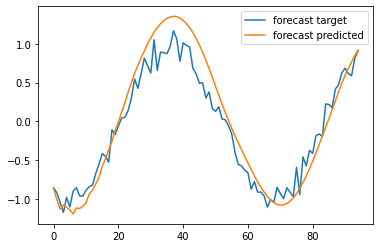

In [ ]:
plt.plot(target,label='forecast target')
plt.plot(predicted,label='forecast predicted')
plt.legend()